In [1]:
import pandas as pd
df = pd.read_csv('data/agg_data.csv')
df.head(10)

,company,position,location,schedule,responsibilities,requirements,levels,techstack,source,date_publish,format,salary,currency
0,Сбербанк,Аналитик данных,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'oracle', 'субд', 'greenplum...",superjob.ru,2022-12-25 10:50:27,Не имеет значения,Договорная,RUB
1,Friendwork,Data Engineer (remote),Москва,Полный рабочий день,не определено,не определено,От 3 лет,"['sql', 'python', 'postgresql', 'spark', 'dock...",superjob.ru,2022-12-19 00:00:00,Удалённая работа (на дому),Договорная,RUB
2,Технопарк «Сколково»,Teamlead проекта,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 11:01:29,Не имеет значения,Договорная,RUB
3,Технопарк «Сколково»,Frontend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:58:50,Не имеет значения,Договорная,RUB
4,Технопарк «Сколково»,Backend-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data science', 'bi', 'ios', 'c', '...",superjob.ru,2022-12-19 10:54:29,Не имеет значения,Договорная,RUB
5,Технопарк «Сколково»,Lead Machine Learning,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['ml', 'data mining', 'data science', 'nlp', '...",superjob.ru,2022-12-20 05:34:14,Не имеет значения,Договорная,RUB
6,Friendwork,Data-analysis-разработчик,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'data analysis', 'data science', 'b...",superjob.ru,2022-12-19 00:00:00,Не имеет значения,Договорная,RUB
7,Южный федеральный университет,"Data Scientist (computer vision, machine learn...",Ростов-на-Дону,Полный рабочий день,не определено,не определено,От 1 года,"['python', 'java', 'анализ данных', 'pandas', ...",superjob.ru,2022-12-23 06:07:13,Не имеет значения,55000,RUB
8,Армтек,Специалист в отдел экспедиции / Аналитик данных,Мытищи,Полный рабочий день,не определено,не определено,Без опыта,"['c', 'r', 'sap', 'ms office', 'office', 'exce...",superjob.ru,2022-12-25 08:11:46,Не имеет значения,Договорная,RUB
9,Технопарк «Сколково»,Data Scientist,Москва,Полный рабочий день,не определено,не определено,От 1 года,"['sql', 'python', 'ml', 'data science', 'c', '...",superjob.ru,2022-12-25 10:43:16,Удалённая работа (на дому),Договорная,RUB


In [2]:
df_copy = df.copy()
df_copy['date_publish'] = pd.to_datetime(df_copy['date_publish'], utc=True)
df_copy['date_publish'] = df_copy['date_publish'].dt.tz_localize(None)
df_copy = df_copy[df_copy['date_publish'] > '2019-12-01']

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df_copy['count'] =1
df_copy['month_year'] = df_copy['date_publish'].dt.to_period('M')
pivot = df_copy.pivot_table(values = 'count',
                               columns = 'month_year',
                               index = 'source', 
                               aggfunc = 'sum'
                                )
pivot.columns = pivot.columns.astype('string')

df_2022 = df_copy.loc[(df_copy['month_year'] >= '2022-12')]
df_2022 = df_2022.reindex(columns = df_2022.columns.tolist() + ['day_month'])  
df_2022['day_month'] = df_2022['date_publish'].dt.to_period('d')
pivot_2022 = df_2022.pivot_table(values = 'count',
                               columns = 'day_month',
                               index = 'source', 
                               aggfunc = 'sum'
                                )
pivot_2022.columns = pivot_2022.columns.astype('string')

<function matplotlib.pyplot.show(close=None, block=None)>

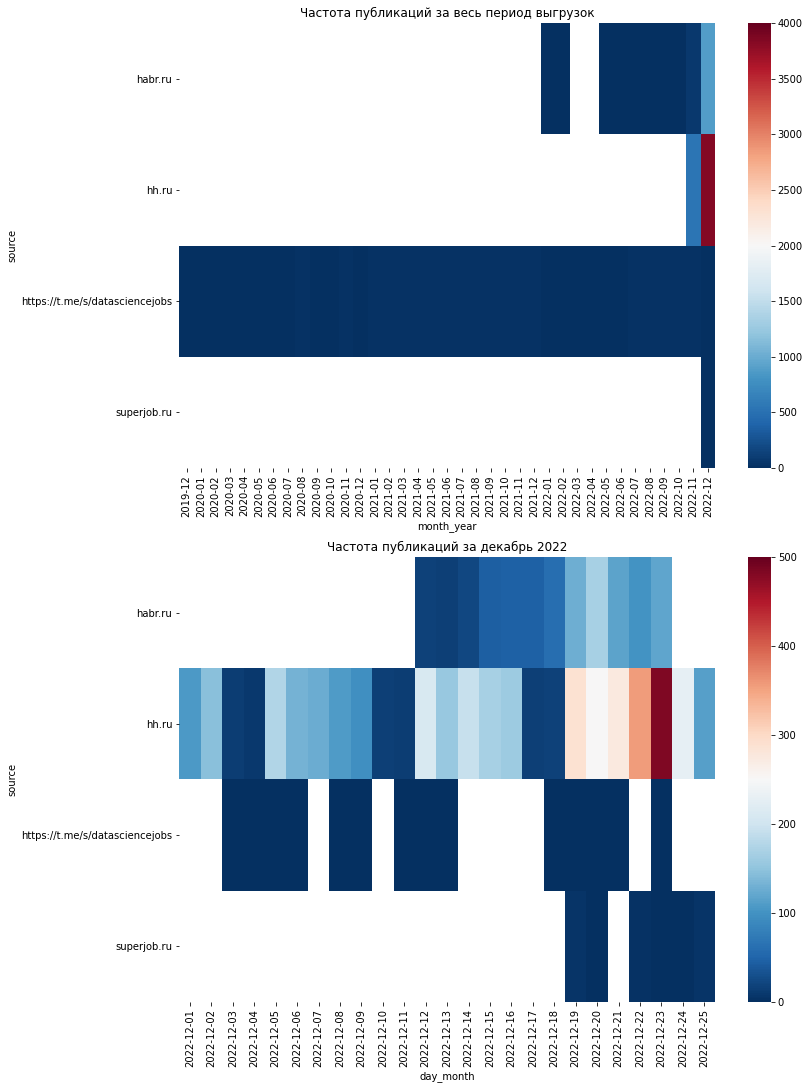

In [4]:
import seaborn as sns
fig, axes = plt.subplots(2,1, figsize = (12,18))
sns.heatmap(data = pivot, fmt="f", cmap='RdBu_r', vmin=0, vmax=4000, ax = axes[0])
sns.heatmap(data = pivot_2022, fmt="f", cmap='RdBu_r', vmin=0, vmax=500, ax = axes[1])
axes[0].set_title('Частота публикаций за весь период выгрузок')
axes[1].set_title('Частота публикаций за декабрь 2022')
plt.show